# EX.15

![ex_15_1.png](./ex_15_1.PNG)
![ex_15_1.png](./ex_15_2.PNG)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [5]:
boston = load_data('Boston')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [6]:
boston.shape

(506, 13)

## Part a

Use **crim** as response and the other entries as predictors and perform a linear regression

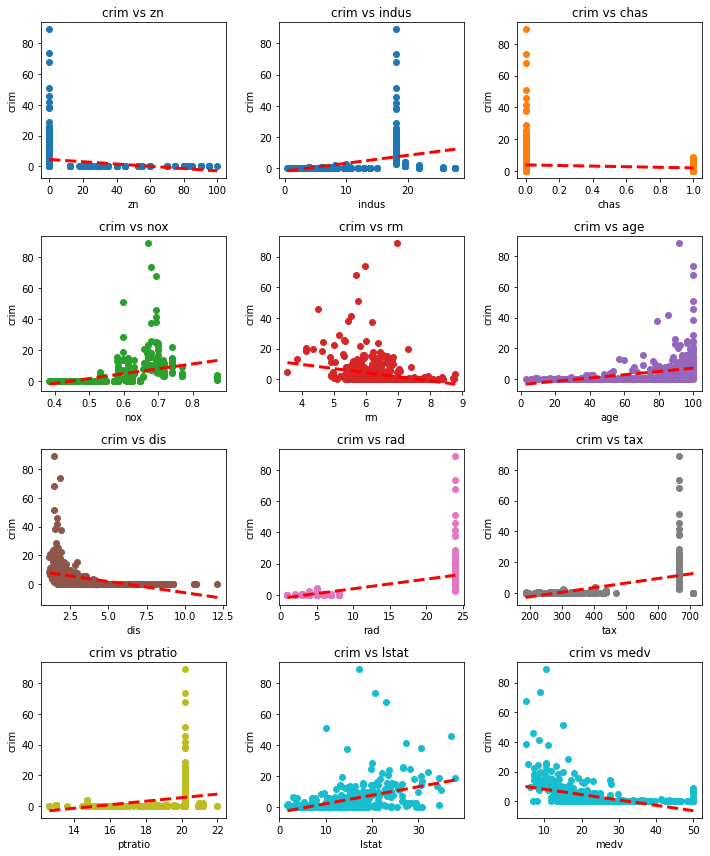

In [7]:
y = boston['crim']
predictors = boston.columns.drop('crim')
models = {}

fig, axes = plt.subplots(4, 3, figsize=(10, 12))
axes = axes.flatten()  # Flatten for easy indexing
colors = plt.colormaps.get_cmap('tab10').resampled(len(predictors))

for i, col in enumerate(predictors):
    X = MS([col]).fit_transform(boston)
    # Build the formula for regression
    formula = 'crim ~ ' +  ' + '.join([col])  
    
    # Fit the model using formula API
    model = ols(formula, data=boston).fit()
    models[f'crim Vs {col}'] = model
    #print(model.summary())
    
    ax = axes[i]
    feature_range = np.linspace(X[col].min(), X[col].max(), len(X)).reshape(-1, 1)
    # Creates a dataframe object of equally separated features to fit linearly
    x_vals_lin = pd.DataFrame({col: feature_range.flatten()})
    ax.scatter(X[col], y, color = colors(i), label=col)
    ax.set_title(f'crim vs {col}')
    ax.set_ylabel('crim')
    ax.set_xlabel(col)
    # Predict using the same transformation
    y_pred_lin = model.predict(x_vals_lin)
    ax.plot(feature_range, y_pred_lin, 'r--', linewidth = 3)

# Hide any unused subplots (if you have more axes than plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [8]:
print(models['crim Vs zn'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           5.51e-06
Time:                        11:03:39   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

In [9]:
print(models['crim Vs indus'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.45e-21
Time:                        11:03:39   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.0

In [10]:
print(models['crim Vs chas'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 30 Aug 2025   Prob (F-statistic):              0.209
Time:                        11:03:39   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

**Pvalue larger than 0.05**, so it can be excluded without detriment to the model

In [11]:
print(models['crim Vs nox'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           3.75e-23
Time:                        11:03:39   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.0

In [12]:
print(models['crim Vs rm'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           6.35e-07
Time:                        11:03:39   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.0

In [13]:
print(models['crim Vs age'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.85e-16
Time:                        11:03:39   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.0

In [14]:
print(models['crim Vs dis'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           8.52e-19
Time:                        11:03:39   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.0

In [15]:
print(models['crim Vs rad'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.69e-56
Time:                        11:03:39   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

In [16]:
print(models['crim Vs tax'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.36e-47
Time:                        11:03:39   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

In [17]:
print(models['crim Vs ptratio'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.94e-11
Time:                        11:03:39   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.0

In [18]:
print(models['crim Vs lstat'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.65e-27
Time:                        11:03:39   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.0

In [19]:
print(models['crim Vs medv'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.17e-19
Time:                        11:03:39   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.0

The only parameter with a pvalue exceeding the threshold is *chas*.

## Part b

In [20]:
X_all = MS(boston.columns.drop('crim')).fit_transform(boston)
y = boston['crim']

# Build the formula for regression
formula_all = 'crim ~ ' +  ' + '.join(boston.columns.drop('crim'))  
    
# Fit the model using formula API
model_all = ols(formula_all, data=boston).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.03e-56
Time:                        11:03:39   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.0

<ul>
The only parameters for which the Null hypothesis can be rejected are: 
<li> **dis**, i.e. the weighted distances to five Boston employment centres, if the distance increases by one unit the crime rate per capita decreas by roughly 1.01; 
<li> **rad**, i.e. index of accessibility to radial highways, if the accessibility to highways increases by one unit the crime rate per capita increases by roughly 0.6125;
<li> **medv**, i.e. Median value of owner-occupied homes in $1000's, if the median values of the homes increases by one unit the crime rate per capita decreases by roughly 0.22;
</ul> 

# Part c

In [89]:
coeffs_ind = {}
for col in models.keys():
    coeffs_ind[col] = models[col].params.iloc[1] 
    
#coeffs = pd.DataFrame(coeffs_ind)
#coeffs = coeffs.drop('Intercept')
coeffs_ind

{'crim Vs zn': -0.07393497740412368,
 'crim Vs indus': 0.5097763311042306,
 'crim Vs chas': -1.892776550803758,
 'crim Vs nox': 31.248531201122923,
 'crim Vs rm': -2.684051224113948,
 'crim Vs age': 0.1077862271395331,
 'crim Vs dis': -1.5509016824100994,
 'crim Vs rad': 0.6179109273272014,
 'crim Vs tax': 0.02974225282276537,
 'crim Vs ptratio': 1.1519827870705872,
 'crim Vs lstat': 0.5488047820623981,
 'crim Vs medv': -0.363159922257603}

In [91]:
coeffs = pd.DataFrame.from_dict(coeffs_ind, orient='index', columns=['Coefficient'])
coeffs

,Coefficient
crim Vs zn,-0.073935
crim Vs indus,0.509776
crim Vs chas,-1.892777
crim Vs nox,31.248531
crim Vs rm,-2.684051
crim Vs age,0.107786
crim Vs dis,-1.550902
crim Vs rad,0.617911
crim Vs tax,0.029742
crim Vs ptratio,1.151983


In [92]:
coeffs_all = pd.DataFrame(model_all.params, columns=['Coefficient'])
coeffs_all = coeffs_all.drop('Intercept')
coeffs_all

,Coefficient
zn,0.045710
indus,-0.058350
chas,-0.825378
nox,-9.957587
rm,0.628911
age,-0.000848
dis,-1.012247
rad,0.612465
tax,-0.003776
ptratio,-0.304073


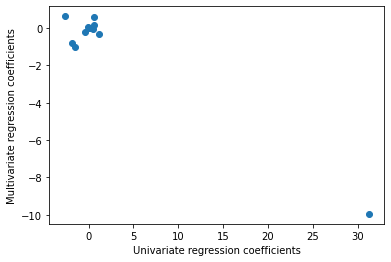

In [105]:
for col in coeffs_all.columns:
    plt.scatter(coeffs[col], coeffs_all[col])
plt.xlabel('Univariate regression coefficients')
plt.ylabel('Multivariate regression coefficients')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
plt.show()

## Part d

In [145]:
y = boston['crim']
predictors = boston.columns.drop('crim')
models3 = {}

for i, col in enumerate(predictors):
    X = boston[[col]]
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = sm.add_constant(poly.fit_transform(X))
    model3 = sm.OLS(y, X_poly).fit()

    models3[f'crim Vs {col}'] = model3
    #print(f'{col} \n {model3.summary()} \n')
    #print(f"{col}: p-values = {model3.pvalues.iloc[2]}")
    if model3.pvalues.iloc[2] < 0.09:
        print(f"{col}: p-values = {model3.pvalues.iloc[2]}")

indus: p-values = 3.420186890898327e-10
nox: p-values = 6.811299804636219e-15
age: p-values = 0.04737732752542005
dis: p-values = 4.941214267724349e-12
ptratio: p-values = 0.004119552122578644
lstat: p-values = 0.0645873560791195
medv: p-values = 3.2605227993744317e-18
